In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/brain tumor/tempCodeRunnerFile.py
/content/drive/MyDrive/brain tumor/model.py
/content/drive/MyDrive/brain tumor/model.ipynb
/content/drive/MyDrive/brain tumor/pred/pred22.jpg
/content/drive/MyDrive/brain tumor/pred/pred45.jpg
/content/drive/MyDrive/brain tumor/pred/pred49.jpg
/content/drive/MyDrive/brain tumor/pred/pred27.jpg
/content/drive/MyDrive/brain tumor/pred/pred8.jpg
/content/drive/MyDrive/brain tumor/pred/pred2.jpg
/content/drive/MyDrive/brain tumor/pred/pred34.jpg
/content/drive/MyDrive/brain tumor/pred/pred39.jpg
/content/drive/MyDrive/brain tumor/pred/pred4.jpg
/content/drive/MyDrive/brain tumor/pred/pred55.jpg
/content/drive/MyDrive/brain tumor/pred/pred48.jpg
/content/drive/MyDrive/brain tumor/pred/pred51.jpg
/content/drive/MyDrive/brain tumor/pred/pred19.jpg
/content/drive/MyDrive/brain tumor/pred/pred0.jpg
/content/drive/MyDrive/brain tumor/pred/pred29.jpg
/content/drive/MyDrive/brain tumor/pred/pred20.jpg
/content/drive/MyDrive/brain tumor/pred/

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import math
import shutil

In [ ]:
ROOT_DIR='/content/drive/MyDrive/brain tumor/dataset'
no_of_images={}

for dir in os.listdir(ROOT_DIR):
  no_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [ ]:
no_of_images.items()

dict_items([('no', 1500), ('yes', 1515)])

# we will split the data such that
* 70 % for Training data
* 15 % for validation 
* 15 % for Testing


In [ ]:
 def dataFolder(p,split):
     if not os.path.exists("./"+p):
       os.mkdir("./"+p)

       for dir in os.listdir(ROOT_DIR):
           os.makedirs("./"+p+"/"+dir)

           for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(split*no_of_images[dir])-5),
                                replace=False):
                 O=os.path.join(ROOT_DIR,dir,img)
                 D=os.path.join("./"+p,dir)  
                 shutil.copy(O,D)
                 os.remove(O)
     else:
       print("the folder exists")      

      

In [ ]:
dataFolder("train",0.7)

In [ ]:
dataFolder("Val",0.15)

In [ ]:
dataFolder("test",0.15)

#Model Building


In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
import keras


In [ ]:
from logging import Manager
from keras.backend import conv2d
#cnn model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer="adam",loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:

def preprocessingImages1(path):
  """
  input:path
  output:pre processed images
  """
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 2100 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
 
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 442 images belonging to 2 classes.


In [ ]:
path="/content/Val"
Val_data=preprocessingImages2(path)
print(Val_data)

Found 442 images belonging to 2 classes.


In [ ]:
#early stopping and model check point
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
#model check point
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

#Model Training

In [ ]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                        verbose=1,
                        validation_data=Val_data,
                        validation_steps=16,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8958 - accuracy: 0.5625WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.67421, saving model to ./bestmodel.h5
8/8 [==============================] - 17s 472ms/step - loss: 0.8958 - accuracy: 0.5625 - val_loss: 0.6136 - val_accuracy: 0.6742
Epoch 2/30
8/8 [==============================] - 1s 131ms/step - loss: 0.5492 - accuracy: 0.7461
Epoch 3/30
8/8 [==============================] - 1s 126ms/step - loss: 0.5937 - accuracy: 0.7031
Epoch 4/30
8/8 [==============================] - 1s 134ms/step - loss: 0.5365 - accuracy: 0.7422
Epoch 5/30
8/8 [==============================] - 2s 227ms/step - loss: 0.4834 - accuracy: 0.7951
Epoch 6/30
8/8 [====================

In [ ]:
#MODEL GRAPHICAL REPRESENTATION

h=hs.history
h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

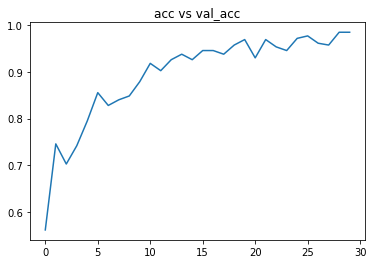

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],c="red")
plt.title("acc vs val_acc")
plt.show()

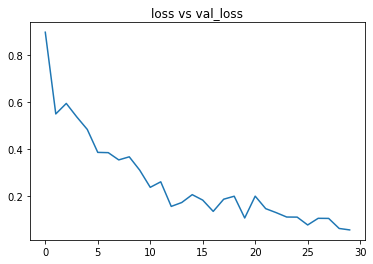

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title("loss vs val_loss")
plt.show()

In [ ]:
#model accuracy

from keras.models import load_model
model =load_model('/content/bestmodel.h5')

In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")

the accuracy of our model is 69.45701241493225%


In [ ]:
from keras.preprocessing import image
# from keras.preprocessing.image import load_img,img_to_array

the MRI is having a tumor


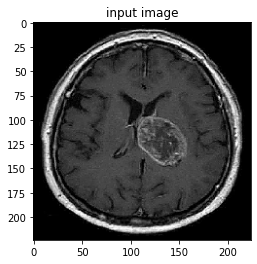

In [ ]:
path="/content/drive/MyDrive/brain tumor/dataset/yes/y1124.jpg"
img = image.load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255

i=image.img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
  print("the MRI is having a tumor")
else:
  print("the Mri is not having a tumor")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()  

In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}